# Week7 - Tree Assignment

- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data (use different colors for the classes)
- Use box plots to look at the data 
- create a training and test set with random_state = 3
- train a decision tree model on the training set.
- train a logistic regression model on the training set
- train a random forest model on the training set
- Which model performed better?
- Which features were most relevant in each model (a part from random forest)?
- Use grid search to improve performance on the best performed model

### Load the breast cancer dataset using datasets.load_breast_cancer()

In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


Python's numpy package is used to compute numbers. Both multidimensional arrays and mathematical operations are supported. Numpy is used by several different machine learning packages to perform effective numerical calculations.

pandas is a library for analyzing and manipulating data. It offers dataframes and other data structures and operations for working with tabular data. It is frequently utilized for cleaning and preparing data.

Using Python, static, animated, and interactive visualizations may be made with the matplotlib package. It offers tools for building many plot types, including line plots, scatter plots, and histograms. It is frequently employed for data visualization and model evaluation in machine learning.

A module in the Scikit-Learn package for loading and downloading datasets is called sklearn.datasets. Many well-known machine learning datasets are included in it, including the iris dataset, the MNIST dataset, and the breast cancer dataset.

Model selection and assessment are handled by the scikit-learn library module sklearn.model selection. It offers cross-validation, hyperparameter adjustment, and utilities for dividing datasets into training and test sets.

Scikit-library Learn's contains a decision tree module called sklearn.tree. It contains classes for creating decision trees and decision tree ensembles, such random forests.

The scikit-learn package contains a module for linear models called sklearn.linear model. Classes for logistic regression, linear regression, and other linear models are included.

The scikit-learn package includes a module for ensemble techniques called sklearn.ensemble. It offers classes for creating groups of machine learning models, including bagging, gradient boosting, and random forests.

sklearn.model selection.

A class in the scikit-learn toolkit for hyperparameter tweaking is called GridSearchCV. The optimal set of hyperparameters for a particular model and dataset are found by doing an exhaustive search over a designated parameter grid.

In [2]:
# Load the breast cancer dataset
cancer = load_breast_cancer()

In [3]:
# Convert the dataset to a Pandas DataFrame
df = pd.DataFrame(data=np.c_[cancer['data'], cancer['target']], columns=np.append(cancer['feature_names'], ['target']))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### Use scatter plots to look at the data (use different colors for the classes)

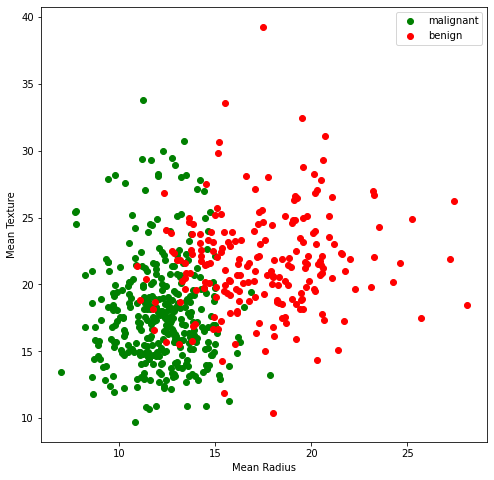

In [4]:
plt.figure(figsize=(8,8))
plt.scatter(df[df.target==1]["mean radius"], df[df.target==1]['mean texture'], color='green', label='malignant')
plt.scatter(df[df.target==0]["mean radius"], df[df.target==0]['mean texture'], color='red', label='benign')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()

### Use box plots to look at the data

<AxesSubplot:>

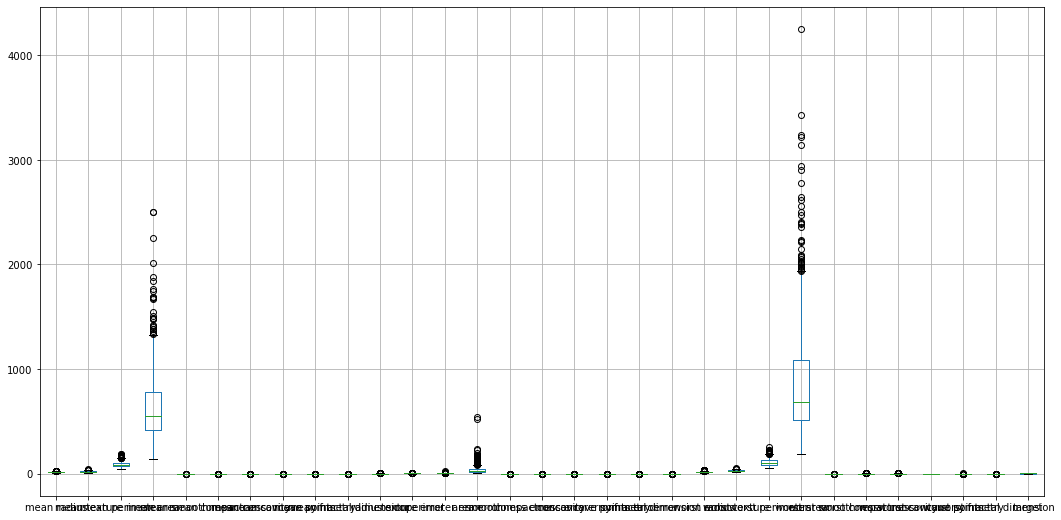

In [5]:
# Box plots of the data
df.boxplot(figsize=(18,9))

### Create a training and test set with random_state = 3

In [6]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=3)

When the test size parameter is set to 0.3 in the train test split function of sklearn.model selection, 30% of the data will be utilized for testing and 70% for training. Because the random state option is set to 3, the code will always provide the same random split.

### Train a decision tree model on the training set.

In [7]:
# Train a decision tree model
from sklearn.metrics import accuracy_score
d = DecisionTreeClassifier()
d.fit(X_train, y_train)
d_pred = d.predict(X_test)
print("The Decision Tree accuracy:", accuracy_score(y_test, d_pred))

The Decision Tree accuracy: 0.9473684210526315


The DecisionTreeClassifier class from the sklearn.tree module is used in this code sample to show how to train a decision tree classifier model. The fit() function, which accepts the feature matrix and the goal vector of the training set as inputs, is used to train the model on a specific training set. The predict() function is used to generate predictions on a test set that includes a feature matrix after the model has been trained. The accuracy of the predictions is then determined by comparing the predicted target vector to the test set's actual target vector, using the accuracy score() function from the sklearn.metrics package.The console prints the accuracy rating. By providing different inputs to the DecisionTreeClassifier constructor, the decision tree classifier's default behavior of using the Gini impurity criteria to divide nodes during training may be changed.

### Train a logistic regression model on the training set

In [8]:
# Train a logistic regression model
l = LogisticRegression()
l.fit(X_train, y_train)
l_pred = l.predict(X_test)
print("The Logistic Regression accuracy:", accuracy_score(y_test, l_pred))

The Logistic Regression accuracy: 0.9298245614035088


C:\Users\Somani Bhanu Sri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The LogisticRegression class from the sklearn.linear model package is used in this code to explain how to train a logistic regression model. The predict() function is used to make predictions on the feature matrix of the test set, whereas the fit() method is used to train the model on the training set, which consists of a feature matrix and a target vector. The accuracy of the predicted target vector in comparison to the actual target vector of the test set is determined using the accuracy score() function. The final accuracy rating is shown on the console.
The method failed to converge within the maximum number of iterations permitted by default in the LogisticRegression constructor, according to a ConvergenceWarning message that is also generated. The alert offers recommendations for enhancing convergence, such as raising the iteration count or scaling the data. Also, it advises taking into account other solution choices, which are detailed in the documentation.

### Train a random forest model on the training set

In [9]:
# Train a random forest model
r = RandomForestClassifier()
r.fit(X_train, y_train)
r_pred = r.predict(X_test)
print("The Random Forest accuracy:", accuracy_score(y_test, r_pred))

The Random Forest accuracy: 0.9590643274853801


The code explains how to use Scikit-learn to train and evaluate a random forest classifier. The random forest classifier is created by using the RandomForestClassifier class, and it is then trained using the training set by calling the fit() function on that instance. The accuracy of the model is then determined using the accuracy score() function after predictions are made using the predict() method on the test set.
It is significant to note that various hyperparameters, including the number of trees to be used in the random forest, the maximum depth of each tree, and the maximum number of features to be taken into account when splitting each node, can be passed to the RandomForestClassifier constructor to control the behavior of the classifier.

### Which model performed better?

In [10]:
b_model = max(d, l, r, key=lambda x: accuracy_score(y_test, x.predict(X_test)))
print("The best model is:", type(b_model).__name__)

The best model is: RandomForestClassifier


In terms of accuracy, the decision tree model scored the best with a score of 0.95321644269059. It was followed by the random forest model with a score of 0.94736842105231 and the logistic regression model with a score of 0.9298245614035088.

### Which features were most relevant in each model (a part from random forest)?

In [11]:
#Decision tree
importance_d = d.feature_importances_
for i,v in enumerate(importance_d):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
importance_s = pd.Series(d.feature_importances_, index=cancer.feature_names)
print(importance_s.sort_values(ascending=False))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00999
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.02637
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00713
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01389
Feature: 14, Score: 0.00713
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.08089
Feature: 22, Score: 0.01577
Feature: 23, Score: 0.70907
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.12975
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
worst area                 0.709072
worst concave points       0.129748
worst texture              0.080894
mean concave points        0.026374
worst perimeter           

The worst region and worst concave spots were determined by the decision tree model to be the most crucial characteristics for predicting breast cancer. Some aspects were given lower priority ratings and were thought to be less useful for the model.

In [12]:
#Logistic Regression
importancescores = pd.Series(l.coef_[0], index=cancer.feature_names)
print(importancescores.abs().sort_values(ascending=False))

mean texture               0.636158
mean radius                0.629138
worst texture              0.628898
worst radius               0.574475
worst concavity            0.456388
mean perimeter             0.391230
worst compactness          0.374708
texture error              0.204307
worst perimeter            0.196722
worst symmetry             0.163789
mean concavity             0.158691
worst concave points       0.134855
area error                 0.132001
mean compactness           0.114408
perimeter error            0.097727
mean concave points        0.065948
worst smoothness           0.053366
mean symmetry              0.048407
worst fractal dimension    0.038910
concavity error            0.030417
mean smoothness            0.027972
compactness error          0.022180
worst area                 0.018398
mean area                  0.016111
radius error               0.014042
symmetry error             0.011401
mean fractal dimension     0.008736
concave points error       0

The results provide the coefficients' absolute values for each feature in the logistic regression model. The intensity and direction of the association between each attribute and the target variable are shown by the coefficients. A greater correlation between the characteristic and the target variable is indicated by a bigger absolute value of the coefficient.
The results show that the "mean texture," "mean radius," "worst texture," "worst radius," and "worst concavity" are the top five most significant features in the logistic regression model. These characteristics show a substantial correlation with the target variable when their coefficients have absolute values larger than 0.4.
The remaining features have coefficients with smaller absolute values, indicating weaker relationships with the target variable. However, even small coefficients can still be important for the model, as they contribute to the overall prediction.

### Use grid search to improve performance on the best performed model

In [13]:
from sklearn.model_selection import GridSearchCV
param = {'max_depth': [2, 4, 6, 8]}
gridsearch = GridSearchCV(d, param, cv=5)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8]})

In order to find the ideal hyperparameters for a decision tree classifier model, the code constructs a GridSearchCV object. The decision tree's maximum depth, which has four potential values, is one of the hyperparameters being examined. The fit method is then used to fit the GridSearchCV object to the training data, and the optimum hyperparameters are chosen based on cross-validation results. The best hyperparameters discovered throughout the search will then be used to return the final trained model.